In [4]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.layers import *
from keras import models
model = models.Sequential()
from keras.preprocessing import image

In [5]:
from tensorflow.keras.applications import VGG19
conv_base = VGG19(weights='imagenet',
include_top=False,
input_shape=(224, 224, 3))

In [6]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [8]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory("/content/drive/MyDrive/Thesis Data/train",
                                            image_size=(224, 224), batch_size=32)

Found 4922 files belonging to 2 classes.


In [9]:
val_dataset = image_dataset_from_directory("/content/drive/MyDrive/Thesis Data/val",
                                             image_size=(224, 224),batch_size=32)

Found 1406 files belonging to 2 classes.


In [10]:
test_dataset = image_dataset_from_directory("/content/drive/MyDrive/Thesis Data/test",
                                             image_size=(224, 224))

Found 705 files belonging to 2 classes.


In [11]:

history = model.fit(
train_dataset,validation_data = val_dataset, epochs=10)

Epoch 1/10
154/154 [==============================] - 764s 4s/step - loss: 187873.5000 - accuracy: 0.5211 - val_loss: 0.6846 - val_accuracy: 0.5583
Epoch 2/10
154/154 [==============================] - 84s 538ms/step - loss: 0.6912 - accuracy: 0.5419 - val_loss: 0.6896 - val_accuracy: 0.5420
Epoch 3/10
154/154 [==============================] - 86s 558ms/step - loss: 0.6901 - accuracy: 0.5421 - val_loss: 0.6897 - val_accuracy: 0.5420
Epoch 4/10
154/154 [==============================] - 87s 558ms/step - loss: 0.6900 - accuracy: 0.5421 - val_loss: 0.6896 - val_accuracy: 0.5420
Epoch 5/10
154/154 [==============================] - 87s 560ms/step - loss: 0.6900 - accuracy: 0.5421 - val_loss: 0.6896 - val_accuracy: 0.5420
Epoch 6/10
154/154 [==============================] - 87s 562ms/step - loss: 0.6895 - accuracy: 0.5421 - val_loss: 0.6896 - val_accuracy: 0.5420
Epoch 7/10
154/154 [==============================] - 86s 557ms/step - loss: 0.6900 - accuracy: 0.5421 - val_loss: 0.6896 - val

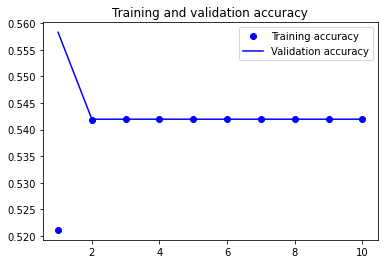

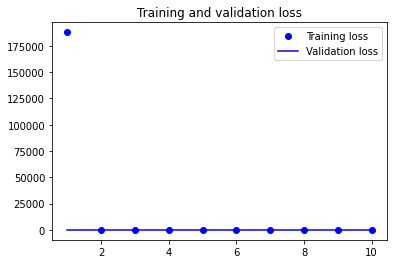

In [12]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [13]:
model.evaluate(test_dataset)

23/23 [==============================] - 114s 3s/step - loss: 0.6897 - accuracy: 0.5418


[0.6896559000015259, 0.5418439507484436]